<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Syllable Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [1]:
# the following line enable interact with figures,  
# you can make zoom and save images from a poup matplotlib window
# to select points: qt ipympl tk. To just visualize: notebook
%matplotlib ipympl

import birdsongs as bs
from birdsongs.util import *

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


Define directories path and show audio files

In [43]:
#audios = "..\\..\\audios\\"
root    = "../examples/" # "path\\to\\repository\\' 
audios  = "/media/sebas/GamesExt/all_audios/" #'audios'       # "path\\to\\audios\\'
results = "results"      # "path\\to\\results\\'

paths  = bs.Paths(root, audios, results, catalog=True)      # root_path, audios_path, catalog
ploter = bs.Ploter(save=True)   # to save figures save=True 
paths.ShowFiles()[['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality']].head() #, 'Altitude'

The folder has 917 songs:


ML Catalog Number       Scientific Name  Year Country-State-County  \
0          475928911  Zonotrichia capensis  2016                 BO-L   
1          418099511  Zonotrichia capensis  2020                 BO-C   
2          268256441  Zonotrichia capensis  2005                 BO-T   
3             286667  Zonotrichia capensis  1994                 BO-C   
4             273370  Zonotrichia capensis  1995                 BO-H   

   Country       State                   Locality  
0  Bolivia      La Paz            Old Coroico Rd.  
1  Bolivia  Cochabamba                Lago Larati  
2  Bolivia      Tarija  Desde Bermejo a La Mamora  
3  Bolivia  Cochabamba   Tablas Monte, Cochabamba  
4  Bolivia  Chuquisaca               Cerro Bufete

Dealing with several audio files and csv metadata

In [3]:
selected = paths.ShowFiles(False)[(paths.ShowFiles(False)['Country'] == 'Colombia')][['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]
#selected = selected[(paths.AudioFiles(False)['State'] != 'Lima')]#[['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]
selected

ML Catalog Number                        Scientific Name  Year  \
866          439171171                   Zonotrichia capensis  2019   
867          288415381                   Zonotrichia capensis  2020   
868          203924951  Zonotrichia capensis [capensis Group]  2015   
869             165970                   Zonotrichia capensis  2009   
870          167949711                   Zonotrichia capensis  2019   
..                 ...                                    ...   ...   
995          224787321                   Zonotrichia capensis  2020   
996          224667991                   Zonotrichia capensis  2020   
997          222944771                   Zonotrichia capensis  2020   
998          222928991                   Zonotrichia capensis  2020   
999          222237461                   Zonotrichia capensis  2020   

    Country-State-County   Country                       State  \
866                CO-DC  Colombia  Distrito Capital de Bogotá   
867               CO-SAN  Colombia                   Santander   
868               CO-CAL  Colombia                      Caldas   
869               CO-ANT  Colombia                   Antioquia   
870                CO-DC  Colombia  Distrito Capital de Bogotá   
..                   ...       ...                         ...   
995               CO-BOY  Colombia                      Boyacá   
996               CO-BOY  Colombia                      Boyacá   
997               CO-BOY  Colombia                      Boyacá   
998               CO-BOY  Colombia                      Boyacá   
999               CO-BOY  Colombia                      Boyacá   

                                              Locality  Latitude  
866  Carrera 136B 153-68, Bogotá CO-DC (4,7610,-74,...  4.760988  
867  Susa road, Onzaga, Santander, CO (6.334, -72.818)  6.333899  
868                       Reserva Ecológica Río Blanco  5.069488  
869  Reserva Natural de las Aves Arrierito Antioque...  6.984826  
870                    Centro Deportivo La Gata Golosa  4.600167  
..                                                 ...       ...  
995  Barrio Coeducadores, Tunja, Boyacá, CO (5,573,...   5.57286  
996  Barrio Coeducadores, Tunja, Boyacá, CO (5,573,...   5.57286  
997  Barrio Coeducadores, Tunja, Boyacá, CO (5,573,...   5.57286  
998  Barrio Coeducadores, Tunja, Boyacá, CO (5,573,...   5.57286  
999  Barrio Coeducadores, Tunja, Boyacá, CO (5,573,...   5.57286  

[134 rows x 8 columns]

Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

Country: Colombia, State: Antioquia


/home/sebas/anaconda3/lib/python3.11/site-packages/birdsongs-0.1b0-py3.11.egg/birdsongs/ploter.py:109: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


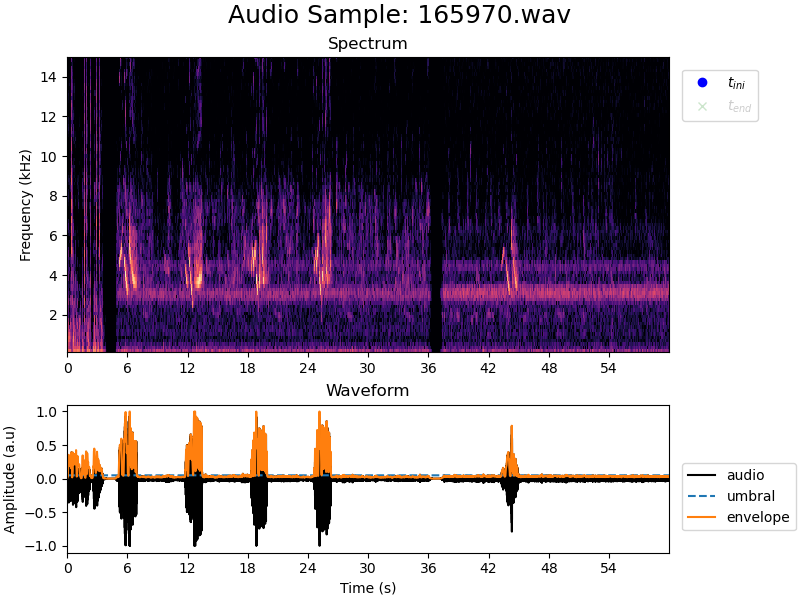

/home/sebas/anaconda3/lib/python3.11/site-packages/ipympl/backend_nbagg.py:279: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.manager.handle_json(content)


In [49]:
file_id = str(paths.data.iloc[selected.index[3]]["ML Catalog Number"])
birdsong = bs.BirdSong(paths, file_id=file_id, tlim=(0,60),# dict=["Col", "DC"],
                       Nt=1000, NN=256, flim=(1e2,15e3)
                       )
print("Country: {}, State: {}".format(birdsong.country, birdsong.state))
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)#, xlim=(2,3.9))
AudioPlay(birdsong)

In [50]:
#time_interval = np.array([3.5720, 3.6098])
time_interval = Positions(ploter.klicker)[0]
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 19.3698 s, final time 19.4244 s


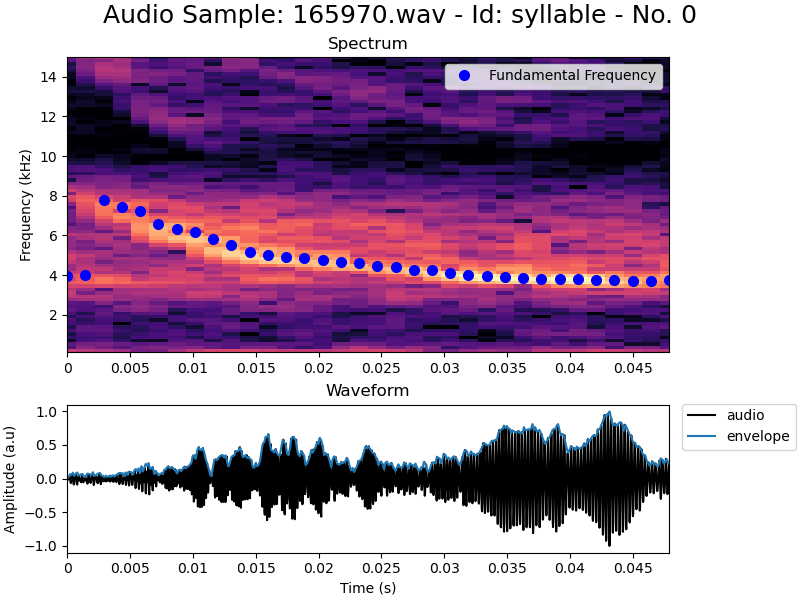

In [52]:
syllable = bs.Syllable(birdsong, tlim=time_interval, Nt=5, NN=256, umbral_FF=1.05, no_syllable=0, type="trill")
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

In [29]:
# plt.figure(); plt.plot(syllable.FF, 'o'); plt.show(); plt.ylim((0, 3.5e4));
# syllable.FF

3D plot (in process)

In [30]:
#ploter.Plot3d(birdsong)

In [7]:
#ploter.Plot(birdsong, FF_on=False, syllable=syllable)

Define syllable with the default syllable extractor

In [15]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# ploter.Plot(syllable)
# AudioPlay(syllable)

In [16]:
# ploter.Plot(birdsong, FF_on=False, syllable_on=True, chunck_on=False)

# Optimal Synthetic Syllable

Define optimization method and its parameters 

In [8]:
brute     = {'method':'brute', 'Ns':21}  # , "workers":-1
optimizer = bs.Optimizer(syllable, method_kwargs=brute)
#?lmfit.minimize

Find optimal $\gamma$ for all the syllables computed by the syllables extractor. You can also just find the optimal for the single syllable

In [9]:
#optimal_gamma = optimizer.OptimalGamma(syllable)
optimal_gamma = 37000 # optimizer.AllGammas(birdsong)
syllable.p["gm"].set(value=optimal_gamma)

In [10]:
syllable.p

Parameters([('a0', <Parameter 'a0', value=0.11 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.0 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.1 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=37000 (fixed), bounds=[10000.0:100000.0]>), ('f0', <Parameter 'f0', value=0 (fixed), bounds=[-1000.0:1000.0]>)])

Optimal $\alpha$ and $\beta$

In [11]:
#              [a0, a1, a2, b0, b1, b2]
#syllable.Set([0.154, 0, 0, -0.4, 1, 1.4])
# syllable.p["b2"].set(value=2)

In [29]:
optimizer.OptimalParams(syllable, Ns=11)

As


/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


$a_0*$=0.0580, t=0.8031 min
Bs
$b_0*$=-0.4000,
b_2*=1.8000, t=7.7007 min
$b_1*$=1.2000, t=0.7667 min
end
Time of execution = 9.2705 minutes


if the fundamental frequency has a similar shape but is shifted vertically, run the following line code

In [30]:
syllable.p

Parameters([('a0', <Parameter 'a0', value=0.058 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.0 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.4 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1.2000000000000002 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=1.8 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=37000 (fixed), bounds=[10000.0:100000.0]>), ('f0', <Parameter 'f0', value=-1000.0 (fixed), bounds=[-1000.0:1000.0]>)])

Display optimal parameters and generate a synthetic syllable 

In [31]:
# syllable.p["a0"].set(value=0.1060)
# syllable.p["b0"].set(value=-0.1)
# syllable.p["b1"].set(value=1.2)
# syllable.p["b2"].set(value=0)

In [32]:
# syllable.BirdData["L"] = 0.025
# syllable.BirdData["r"] = 0.65
# syllable.BirdData["MG"] = 20
# syllable.BirdData["RB"] = 5E6
# syllable.BirdData["Rh"] = 24E3
# syllable.BirdData["Ch"] = 1.43E-10
# # MG related to harmonics
syllable.BirdData

{'C': 343,
 'L': 0.025,
 'r': 0.65,
 'Ch': 1.43e-10,
 'MG': 20,
 'MB': 10000.0,
 'RB': 5000000.0,
 'Rh': 24000.0}

In [33]:
#f0 = optimizer.OptimalF0(syllable)

In [34]:
Display(syllable.p)
synth_syllable = syllable.Solve(syllable.p)

Parameters([('a0', <Parameter 'a0', value=0.058 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.0 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.4 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1.2000000000000002 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=1.8 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=37000 (fixed), bounds=[10000.0:100000.0]>), ('f0', <Parameter 'f0', value=-1000.0 (fixed), bounds=[-1000.0:1000.0]>)])

Visualize and plot the synthetic syllable

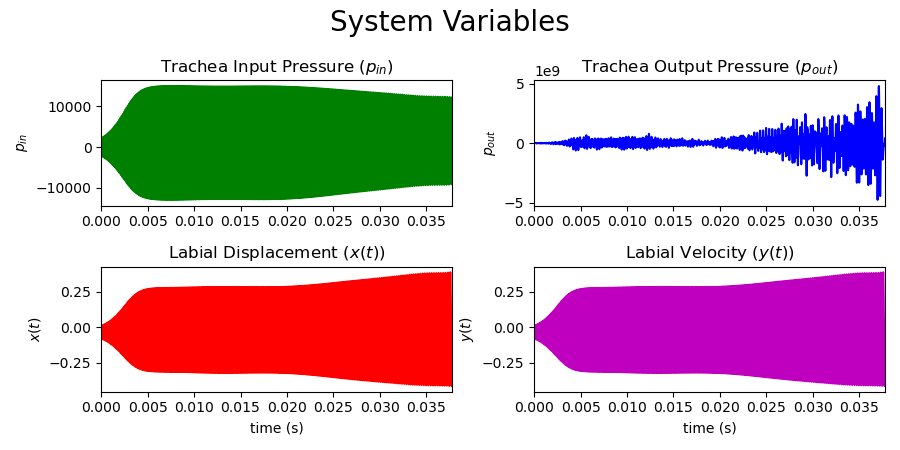

In [38]:
ploter.PlotVs(synth_syllable);

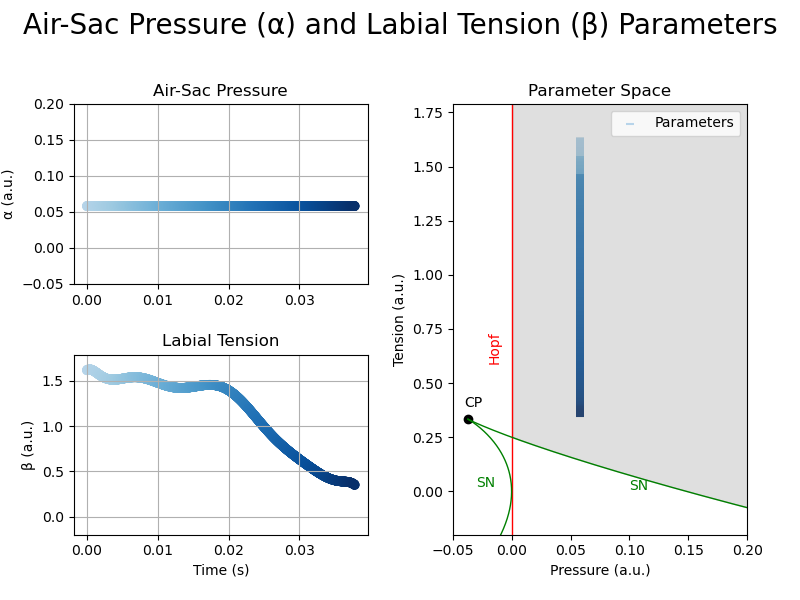

In [39]:
ploter.PlotAlphaBeta(synth_syllable);

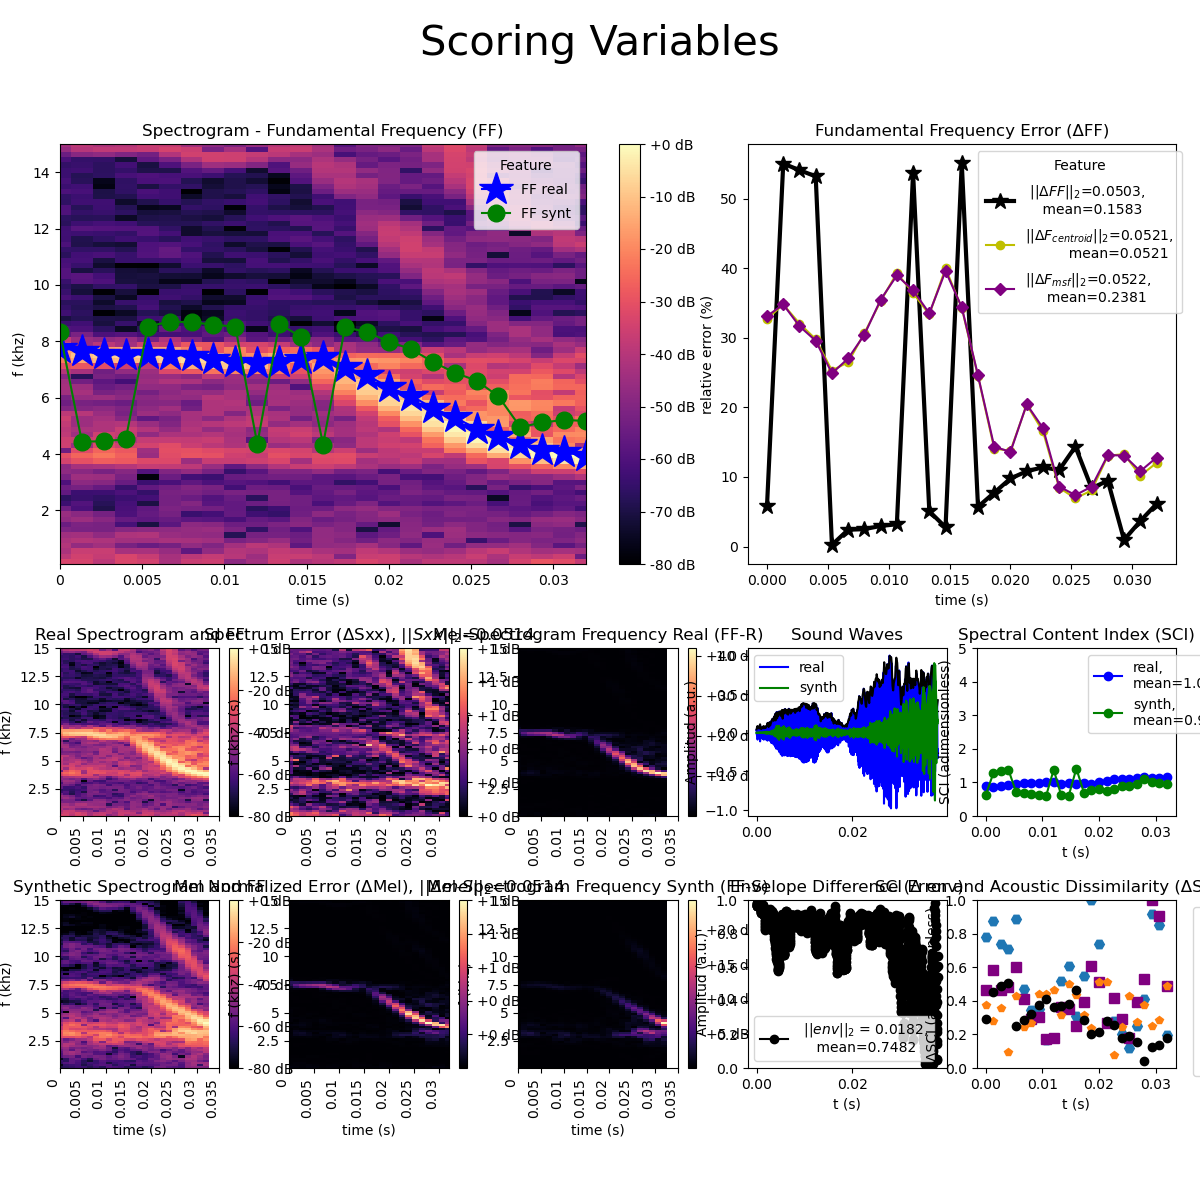

In [40]:
#synth_syllable.freqs -= f0
#synth_syllable.FF -= f0
ploter.Result(syllable, synth_syllable, figsize=(12,12));

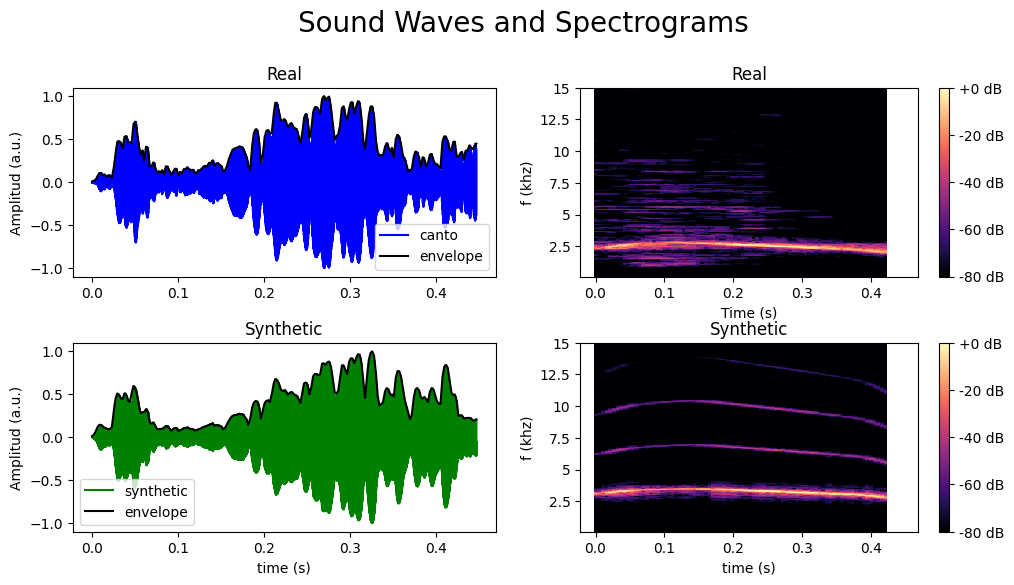

No such comm: e37788401e1a41dc9f37f6deea8434b5


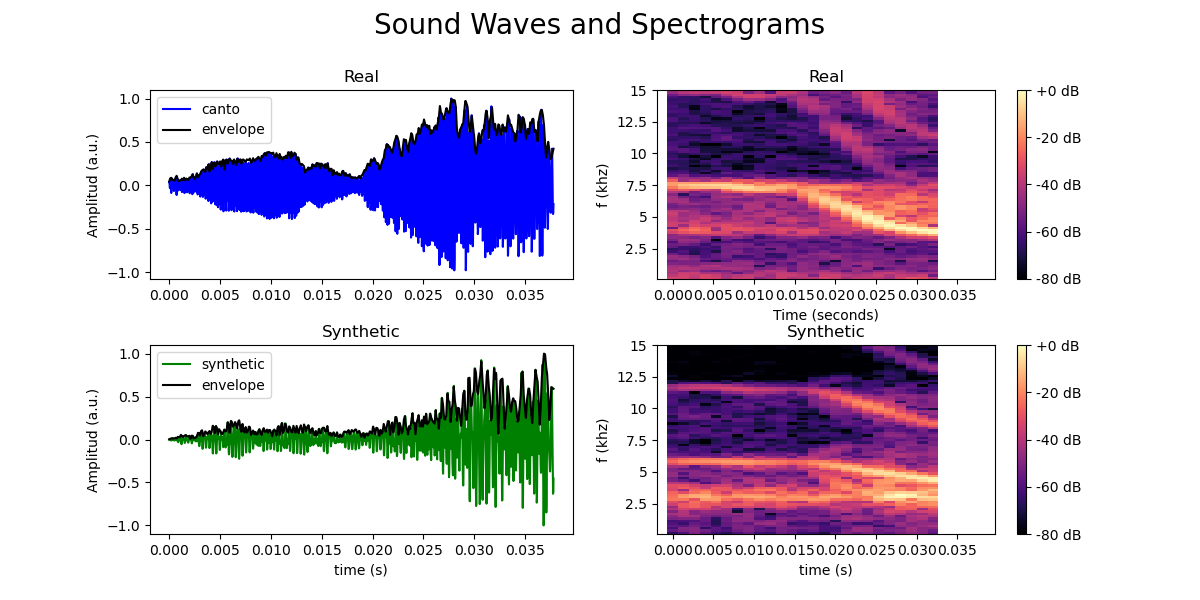

In [21]:
ploter.Syllables(syllable, synth_syllable);

In [22]:
AudioPlay(syllable)

No such comm: 86361257b52b4dd18f8cd7516fe812c2


In [23]:
AudioPlay(synth_syllable)

Write synthetic and real syllables

In [24]:
syllable.ExportMotorGestures()
#syllable.WriteAudio();  synth_syllable.WriteAudio();

End